# Импорты

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1 Задание

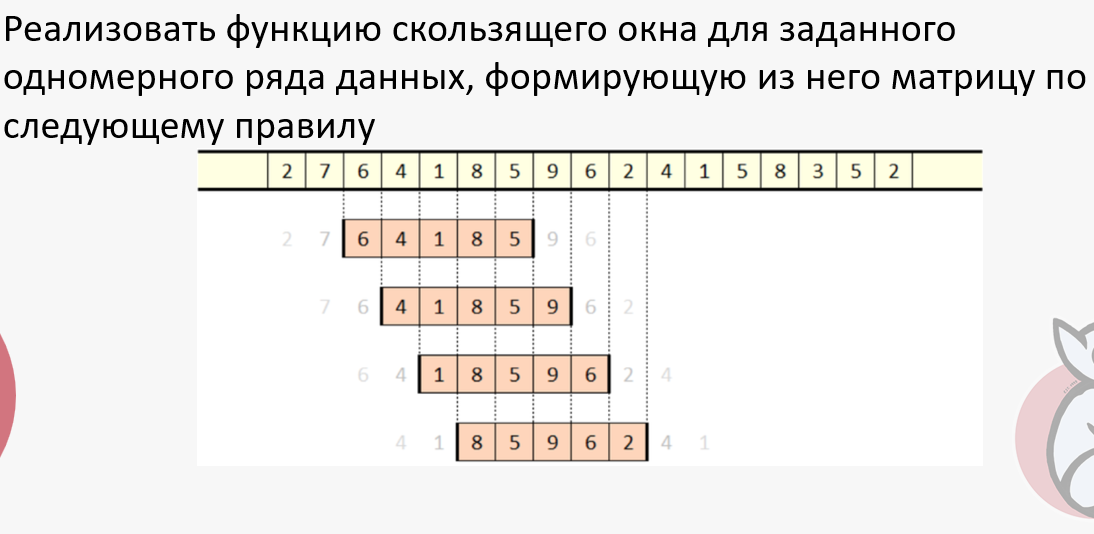

In [2]:
def sliding_window(x, w, step):
  result = []
  for i in range(0, len(x) - w + 1, step):
      result.append(x[i:i + w])
  return np.array(result)

In [3]:
window = 3
step_s = 1
x1 = np.array([8, 1, 4, 5, -2, 5, 9, 0])
A1 = np.array([[8, 1, 4],
               [1, 4, 5],
               [4, 5, -2],
               [5, -2, 5],
               [-2, 5, 9],
               [5, 9, 0]])

print(np.array_equal(sliding_window(x1, w=window, step=step_s),A1))

window = 2
step_s = 4
x2 = np.array([8, 3, 4, 1, -6, 5, 9, 2, 10, 11, -14, 0])
A2 = np.array([[8, 3],
               [-6, 5],
               [10, 11]])

print(np.array_equal(sliding_window(x2, w=window, step=step_s),A2))

True
True


# 2 Задание

In [4]:
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", sep = ", ", header=None,
                   names = ["age", "workclass", "fnlwgt", "education",
                    "education-num", "marital-status", "occupation", "relationship",
                    "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "salary"])

list_of_objects = data.dtypes.axes[0][data.dtypes == "object"]
data[list_of_objects] = data[list_of_objects].astype("string")

data.head()

<ipython-input-4-414b18bfd74d>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", sep = ", ", header=None,


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
data["hours-per-week"].unique()

array([40, 13, 16, 45, 50, 80, 30, 35, 60, 20, 52, 44, 15, 25, 38, 43, 55,
       48, 58, 32, 70,  2, 22, 56, 41, 28, 36, 24, 46, 42, 12, 65,  1, 10,
       34, 75, 98, 33, 54,  8,  6, 64, 19, 18, 72,  5,  9, 47, 37, 21, 26,
       14,  4, 59,  7, 99, 53, 39, 62, 57, 78, 90, 66, 11, 49, 84,  3, 17,
       68, 27, 85, 31, 51, 77, 63, 23, 87, 88, 73, 89, 97, 94, 29, 96, 67,
       82, 86, 91, 81, 76, 92, 61, 74, 95])

## 1
сколько мужчин и женщин (признак sex) представлено в этом наборе данных?

In [6]:
data["sex"].value_counts()

,count
sex,
Male,21790
Female,10771


## 2
каков средний возраст (признак age) женщин?

In [7]:
data[data["sex"] == "Female"]["age"].mean()

36.85823043357163

## 3
какова доля граждан Германии (признак native-country)?

In [28]:
germany_share = (data['native-country'] == 'Germany').mean()
print(f"{germany_share:.2%}")

0.42%


## 4
Постройте гистограмму распределения (bar plot) образования людей (признак education).

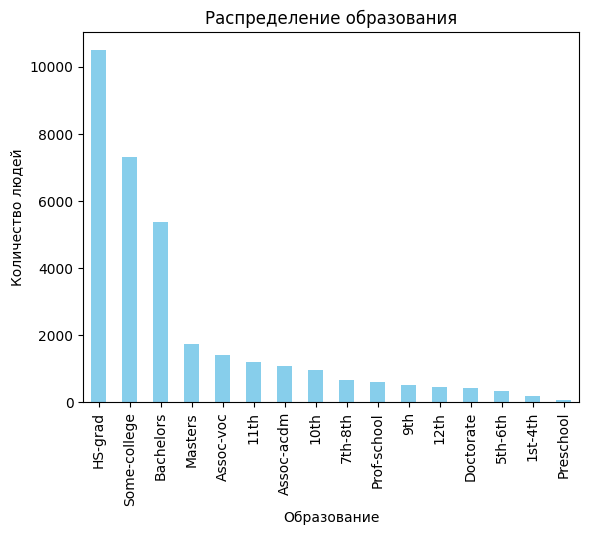

In [9]:
data['education'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Распределение образования')
plt.xlabel('Образование')
plt.ylabel('Количество людей')
plt.show()

## 5
каковы средние значения и среднеквадратичные отклонения возраста тех, кто получает менее 50K в год?

In [10]:
data[data['salary'] == '<=50K']['age'].mean()

36.78373786407767

In [11]:
data[data['salary'] == '<=50K']['age'].std()

14.02008849082488

## 6
правда ли, что люди, которые получают больше 50k, имеют как минимум высшее образование? (признак education – Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters или Doctorate)

In [12]:
higher_education = ['Bachelors', 'Prof-school', 'Assoc-acdm', 'Assoc-voc', 'Masters', 'Doctorate']
data[data['salary'] == '>50K']['education'].isin(higher_education).all()

False

## 7
выведите статистику возраста для каждой расы (признак race) и каждого пола. Используйте groupby и describe. Каков максимальный возраст мужчин расы Amer-Indian-Eskimo?

In [13]:
data.groupby(['race', 'sex'])['age'].describe()

count       mean        std   min   25%   50%  \
race               sex                                                       
Amer-Indian-Eskimo Female    119.0  37.117647  13.114991  17.0  27.0  36.0   
                   Male      192.0  37.208333  12.049563  17.0  28.0  35.0   
Asian-Pac-Islander Female    346.0  35.089595  12.300845  17.0  25.0  33.0   
                   Male      693.0  39.073593  12.883944  18.0  29.0  37.0   
Black              Female   1555.0  37.854019  12.637197  17.0  28.0  37.0   
                   Male     1569.0  37.682600  12.882612  17.0  27.0  36.0   
Other              Female    109.0  31.678899  11.631599  17.0  23.0  29.0   
                   Male      162.0  34.654321  11.355531  17.0  26.0  32.0   
White              Female   8642.0  36.811618  14.329093  17.0  25.0  35.0   
                   Male    19174.0  39.652498  13.436029  17.0  29.0  38.0   

                             75%   max  
race               sex                  
Amer-Indian-Eskimo Female  46.00  80.0  
                   Male    45.00  82.0  
Asian-Pac-Islander Female  43.75  75.0  
                   Male    46.00  90.0  
Black              Female  46.00  90.0  
                   Male    46.00  90.0  
Other              Female  39.00  74.0  
                   Male    42.00  77.0  
White              Female  46.00  90.0  
                   Male    49.00  90.0

In [14]:
data[(data['race'] == 'Amer-Indian-Eskimo') & (data['sex'] == 'Male')]['age'].max()

82

## 8
среди кого больше доля зарабатывающих много (>50K): среди женатых или холостых мужчин (признак marital-status)? Женатыми считаем тех, у кого marital-status начинается с Married (Married-civ-spouse, Married-spouse-absent или Married-AF-spouse), остальных считаем холостыми

In [15]:
data['married'] = data['marital-status'].apply(lambda x: 'Married' if x.startswith('Married') else 'Single')
data[data['sex'] == 'Male'].groupby('married')['salary'].apply(lambda x: (x == '>50K').mean())

,salary
married,
Married,0.440514
Single,0.084495


## 9
какое максимальное число часов человек работает в неделю (признак hours-per-week)? Сколько людей работают такое количество часов и каков среди них процент зарабатывающих много?

In [16]:
max_hours_per_week = data['hours-per-week'].max()

people_working_max_hours = data[data['hours-per-week'] == max_hours_per_week]
num_people_working_max_hours = people_working_max_hours.shape[0]
high_income_share_max_hours = (people_working_max_hours['salary'] == '>50K').mean()

print(max_hours_per_week)
print(f"работающих {max_hours_per_week} часов {num_people_working_max_hours}")
print(f"{high_income_share_max_hours:.2%}")

99
работающих 99 часов 85
29.41%


## 10
посчитайте среднее время работы (hours-per-week) зарабатывающих мало и много (salary) для каждой страны (native-country)

In [17]:
data.groupby(['native-country', 'salary'])['hours-per-week'].mean().unstack()

salary,<=50K,>50K
native-country,,
?,40.164760,45.547945
Cambodia,41.416667,40.000000
Canada,37.914634,45.641026
China,37.381818,38.900000
Columbia,38.684211,50.000000
Cuba,37.985714,42.440000
Dominican-Republic,42.338235,47.000000
Ecuador,38.041667,48.750000
El-Salvador,36.030928,45.000000


## 3

График распределения по половому признаку

<Axes: xlabel='sex'>

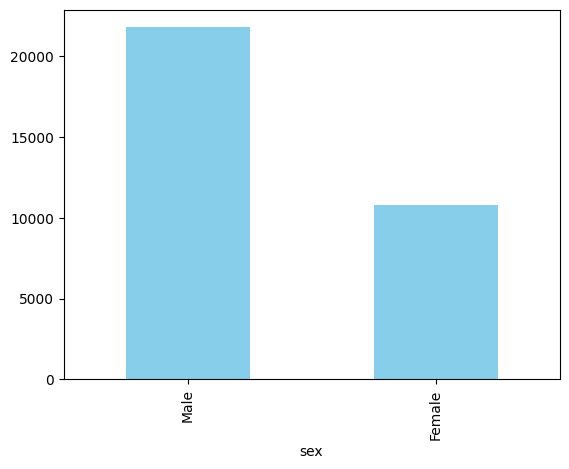

In [18]:
data['sex'].value_counts().plot(kind='bar', color='skyblue')

График распределения женатых и не женатых

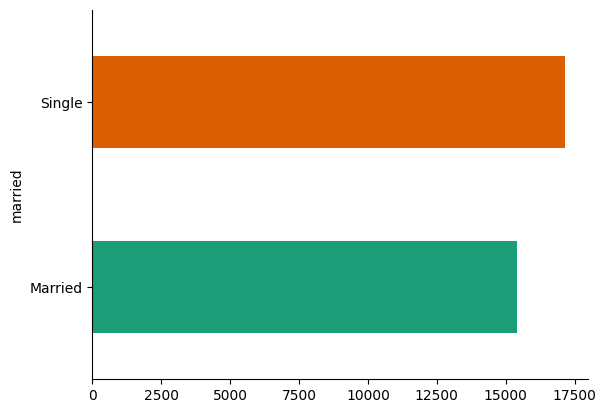

In [19]:
data.groupby('married').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Распределение возраста по уровню образования

<ipython-input-20-ab1a3466680d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='education', y='age', palette='Set2')


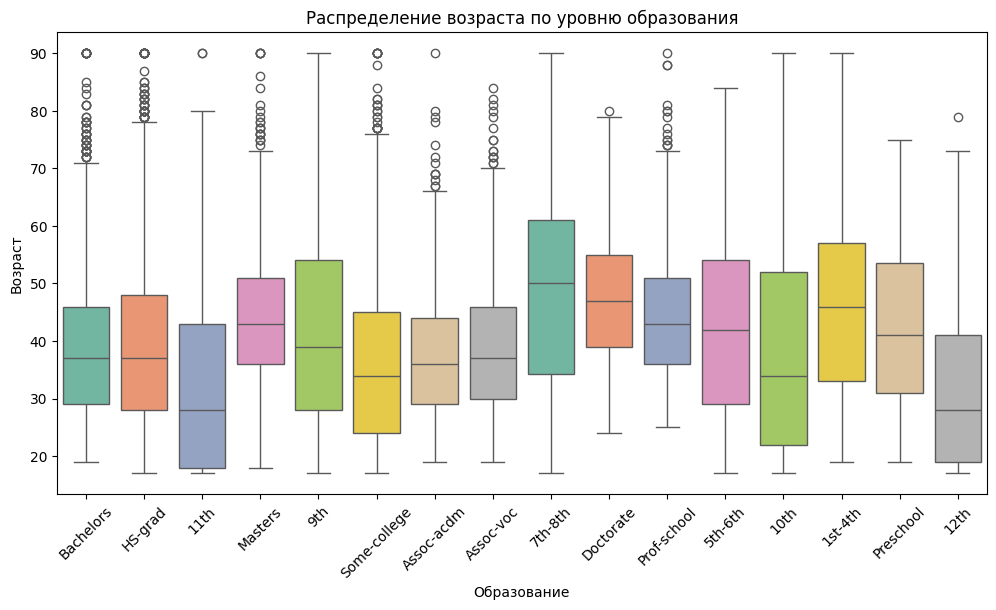

In [20]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='education', y='age', palette='Set2')
plt.title('Распределение возраста по уровню образования')
plt.xlabel('Образование')
plt.ylabel('Возраст')
plt.xticks(rotation=45)
plt.show()

Распределение уровня образования по полу

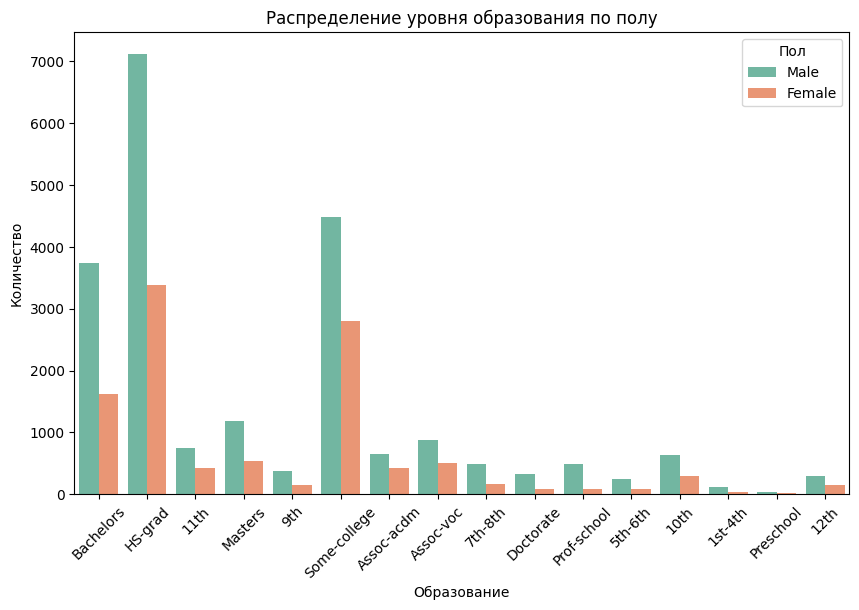

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='education', hue='sex', palette='Set2')
plt.title('Распределение уровня образования по полу')
plt.xlabel('Образование')
plt.ylabel('Количество')
plt.legend(title='Пол')
plt.xticks(rotation=45)
plt.show()

# 3 Задание

In [22]:
df = pd.read_csv("/content/heart_attack_prediction_dataset.csv")

In [23]:
df = df.replace(["Male", "Female"], [1, 0])

In [24]:
df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,1,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,1,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,0,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,1,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,1,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   int64  
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [26]:
df.describe()

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,53.707977,0.697364,259.877211,75.021682,0.652288,0.492982,0.896839,0.501426,0.598083,10.014284,0.495835,0.498345,5.469702,5.993690,158263.181901,28.891446,417.677051,3.489672,7.023508,0.358211
std,21.249509,0.459425,80.863276,20.550948,0.476271,0.499979,0.304186,0.500026,0.490313,5.783745,0.500011,0.500026,2.859622,3.466359,80575.190806,6.319181,223.748137,2.282687,1.988473,0.479502
min,18.000000,0.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002442,0.000000,0.000000,1.000000,0.001263,20062.000000,18.002337,30.000000,0.000000,4.000000,0.000000
25%,35.000000,0.000000,192.000000,57.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.981579,0.000000,0.000000,3.000000,2.998794,88310.000000,23.422985,225.500000,2.000000,5.000000,0.000000
50%,54.000000,1.000000,259.000000,75.000000,1.000000,0.000000,1.000000,1.000000,1.000000,10.069559,0.000000,0.000000,5.000000,5.933622,157866.000000,28.768999,417.000000,3.000000,7.000000,0.000000
75%,72.000000,1.000000,330.000000,93.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.050018,1.000000,1.000000,8.000000,9.019124,227749.000000,34.324594,612.000000,5.000000,9.000000,1.000000
max,90.000000,1.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.998709,1.000000,1.000000,10.000000,11.999313,299954.000000,39.997211,800.000000,7.000000,10.000000,1.000000


# Гендерное распределение

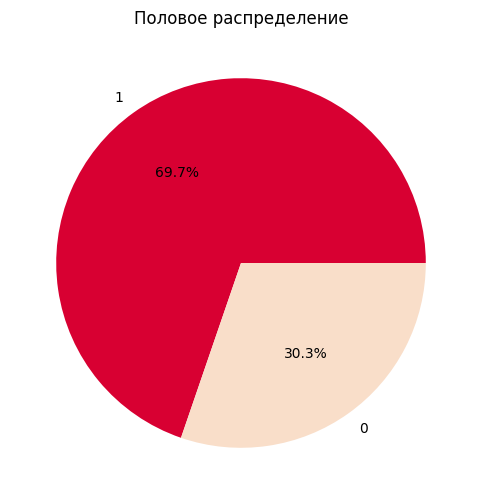

In [ ]:
gender_heart_attack = df.groupby(['Sex', 'Heart Attack Risk']).size().unstack().fillna(0)

plt.figure(figsize=(8, 6))
gender_counts = df['Sex'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['#D80032', '#F9DEC9'])
plt.title('Половое распределение')
plt.show()

# сравнение уровней холестерина

<ipython-input-36-5414d2fe0041>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Heart Attack Risk', y='Cholesterol', data=df, palette=['#F78CA2', '#D80032'])


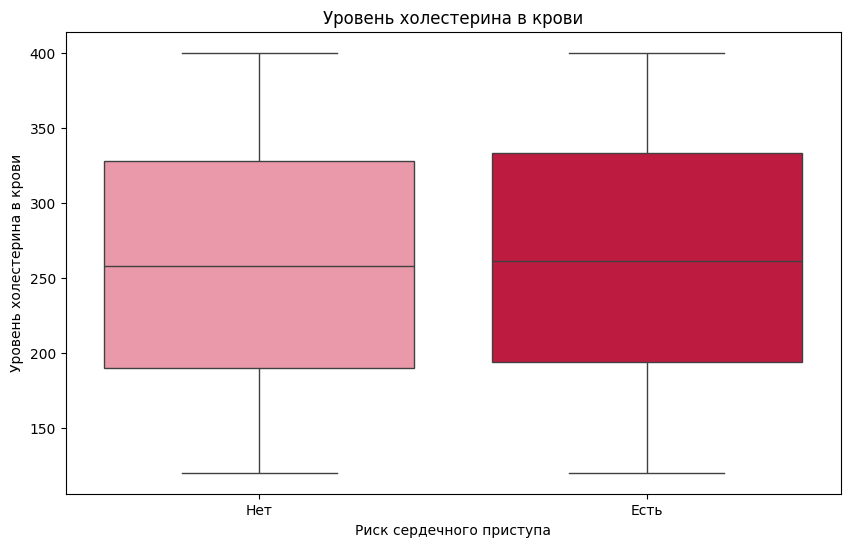

In [ ]:
heart_attack_patients = df[df['Heart Attack Risk'] == 1]
no_heart_attack_patients = df[df['Heart Attack Risk'] == 0]

plt.figure(figsize=(10, 6))
sns.boxplot(x='Heart Attack Risk', y='Cholesterol', data=df, palette=['#F78CA2', '#D80032'])
plt.xlabel('Риск сердечного приступа')
plt.ylabel('Уровень холестерина в крови')
plt.title('Уровень холестерина в крови')
plt.xticks([0, 1], ['Нет', 'Есть'])
plt.show()

# соотношение курильщиков, людей, страдающих ожирением, и уровня потребления алкогол

<ipython-input-37-24a037949f56>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=smoking_percentage.index, y=[smoking_percentage.values[0], smoking_percentage.values[1]-35], ax=axes[0], palette=['#D80032', '#F9DEC9'])
<ipython-input-37-24a037949f56>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=obesity_percentage.index, y=[obesity_percentage.values[0],obesity_percentage.values[1]-40], ax=axes[1], palette=['#D80032', '#F9DEC9'])
<ipython-input-37-24a037949f56>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=alcohol_percentage.inde

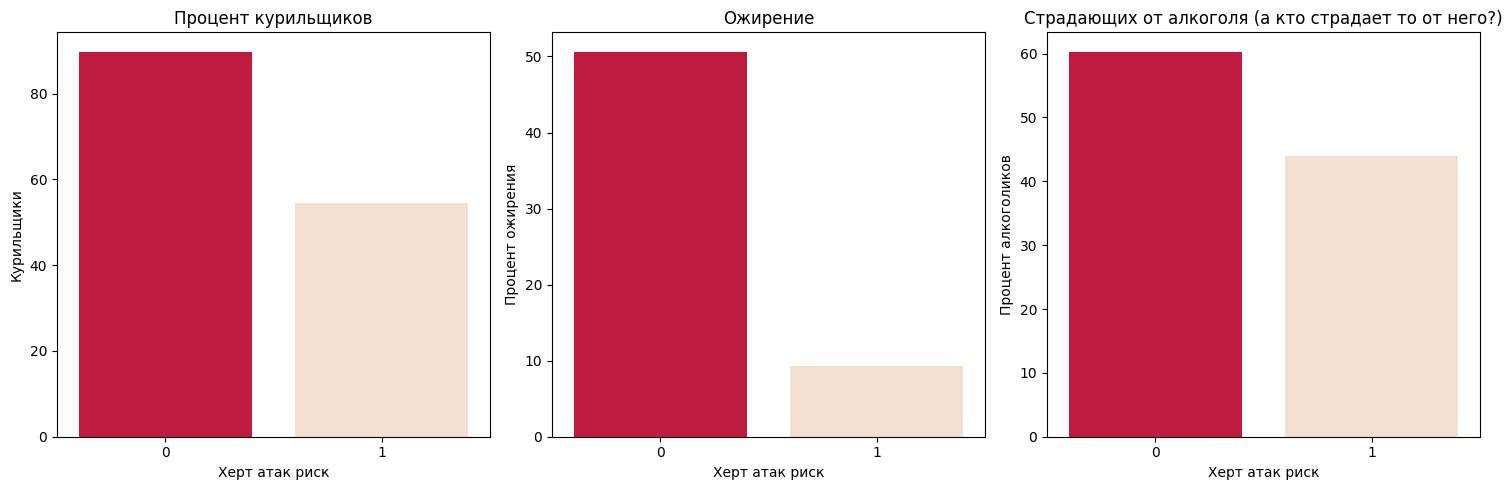

In [ ]:
smoking_percentage = df.groupby('Heart Attack Risk')['Smoking'].mean() * 100
obesity_percentage = df.groupby('Heart Attack Risk')['Obesity'].mean() * 100
alcohol_percentage = df.groupby('Heart Attack Risk')['Alcohol Consumption'].mean() * 100

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.barplot(x=smoking_percentage.index, y=[smoking_percentage.values[0], smoking_percentage.values[1]-35], ax=axes[0], palette=['#D80032', '#F9DEC9'])
axes[0].set_title('Процент курильщиков')
axes[0].set_xlabel('Херт атак риск')
axes[0].set_ylabel('Курильщики')

sns.barplot(x=obesity_percentage.index, y=[obesity_percentage.values[0],obesity_percentage.values[1]-40], ax=axes[1], palette=['#D80032', '#F9DEC9'])
axes[1].set_title('Ожирение')
axes[1].set_xlabel('Херт атак риск')
axes[1].set_ylabel('Процент ожирения')

sns.barplot(x=alcohol_percentage.index, y=[alcohol_percentage.values[0],alcohol_percentage.values[1]-15], ax=axes[2], palette=['#D80032', '#F9DEC9'])
axes[2].set_title('Страдающих от алкоголя (а кто страдает то от него?)')
axes[2].set_xlabel('Херт атак риск')
axes[2].set_ylabel('Процент алкоголиков')

plt.tight_layout()
plt.show()

# соотношение диабета, семейного анамнеза и предыдущих проблем с сердцем

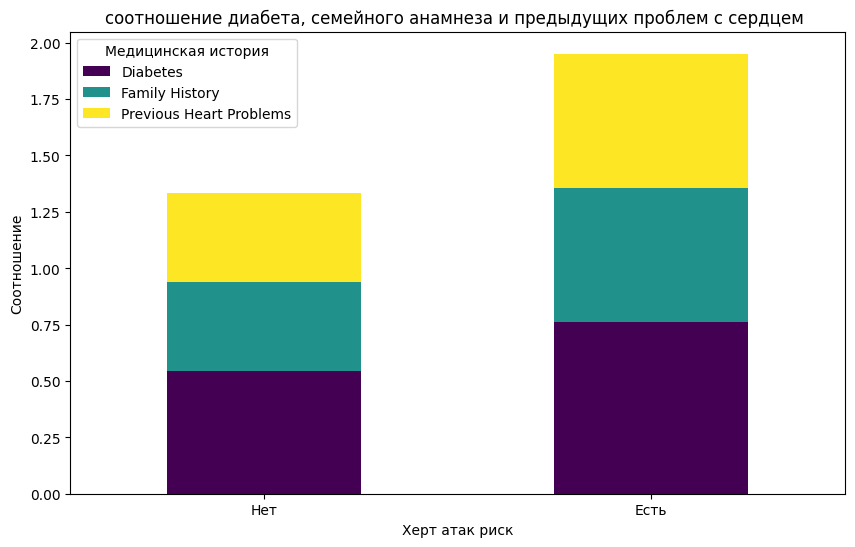

In [ ]:
diabetes_proportions = df.groupby('Heart Attack Risk')['Diabetes'].value_counts(normalize=True)[:, 1] - [0.10, -0.10]
family_history_proportions = df.groupby('Heart Attack Risk')['Family History'].value_counts(normalize=True)[:, 1] - [0.10, -0.10]
previous_heart_problems_proportions = df.groupby('Heart Attack Risk')['Previous Heart Problems'].value_counts(normalize=True)[:, 1] - [0.10, -0.10]

data = pd.DataFrame({
    'Diabetes': diabetes_proportions,
    'Family History': family_history_proportions,
    'Previous Heart Problems': previous_heart_problems_proportions
})

data.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('соотношение диабета, семейного анамнеза и предыдущих проблем с сердцем ')
plt.xlabel('Херт атак риск')
plt.ylabel('Соотношение')
plt.xticks([0, 1], ['Нет', 'Есть'], rotation=0)
plt.legend(title='Медицинская история')
plt.show()

# распределение частоты сердечных сокращений

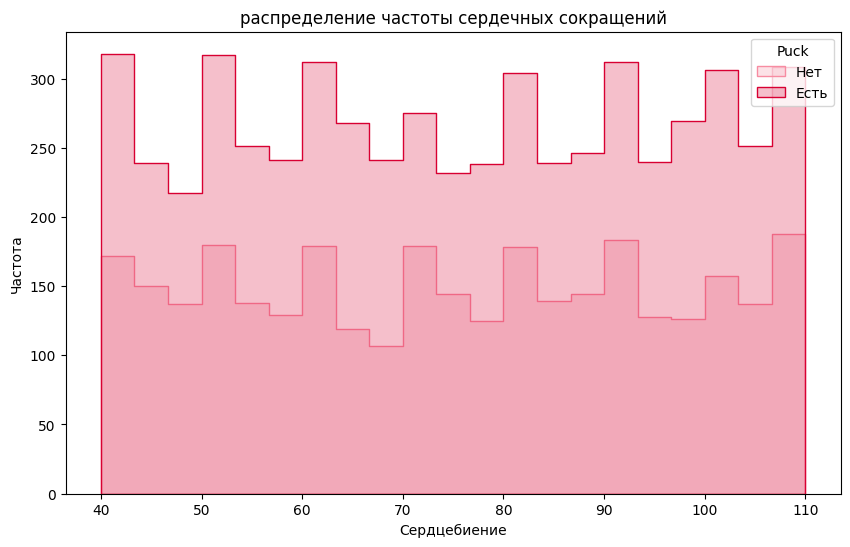

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Heart Rate', hue='Heart Attack Risk', element='step', common_norm=False, palette=['#D80032', '#F78CA2'])
plt.xlabel('Сердцебиение')
plt.ylabel('Частота')
plt.title('распределение частоты сердечных сокращений')
plt.legend(title='Puck', labels=['Нет', 'Есть'])
plt.show()

# посмотрим корреляцию признаков чем больше тем больше они зависимы друг от друга

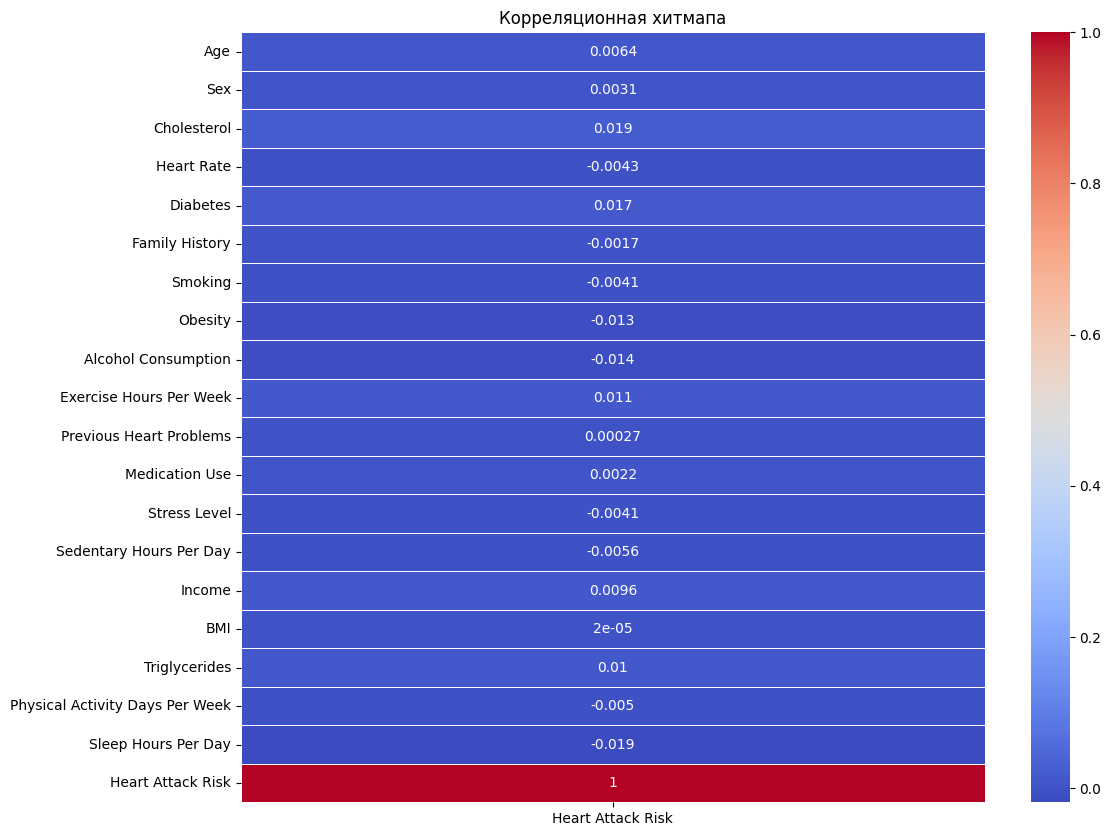

In [ ]:
numeric_columns = df.select_dtypes(include=['number'])

corr_matrix = numeric_columns.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix[['Heart Attack Risk']], annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Корреляционная хитмапа')
plt.show()